In [ ]:
import pandas as pd
import mysql.connector as connector
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
conn = connector.connect(host="localhost", port="3306", user="root",
                                      password="1234567", database="amazonproject")

In [ ]:
Amazon=pd.read_sql_query("select * from amazon",conn)
Amazon

,Selection_ID,Selection_Name
0,1,Shopping
1,2,Pay
2,3,Prime Videos
3,4,Prime Music


In [ ]:
category=pd.read_sql_query("select * from category",conn)
category.head()

,Selection_ID,Category_ID,Category_Name
0,1,1,Echo & Alexa
1,1,2,Mobile & Computer
2,1,3,Sport & Luggage
3,1,4,Fashion
4,1,5,Electronics


In [ ]:
sub_category=pd.read_sql_query("select * from sub_category",conn)
sub_category.head()

,Category_ID,Sub_Category_ID,Sub_Category_Name
0,1,1,"All-New Echo Dot (4th Gen, 2020 release)"
1,1,3,Echo Show 8
2,1,4,Echo Studio
3,1,5,Meet Alexa
4,1,6,Alexa Smart Home


In [ ]:
Shopping_ite=pd.read_sql_query("select * from shopping_items",conn)
Shopping_ite.head()

,Sub_Category_ID,Item_id,Item_Name,Item_Price,Item_Rating,Total_Rating
0,1,1,"Echo Dot (4th Gen, 2020 release)",3699.0,4.4,24273.0
1,3,3,"Echo Show 8 (1st Gen, 2020 release)",8999.0,4.4,3894.0
2,4,4,Echo Studio - Smart speaker,22999.0,4.2,729.0
3,6,5,All-new Echo Dot (4th Gen),3899.0,4.5,3899.0
4,6,6,All-new Echo Dot (3rd Gen),3149.0,4.4,3199.0


In [ ]:
prime_video=pd.read_sql_query("select * from prime_video_item",conn)
prime_video.head()

,Sub_Category_ID,Prime_Id,Name,Season,IMBD_Rating
0,61,1,Pataal Lok,1,7.5
1,61,2,Made in Heaven,1,8.3
2,61,3,Homecoming,2,7.5
3,61,4,Mirzapur,1,8.5
4,61,5,Man with a Plan,4,7.4


In [ ]:
songs=pd.read_sql_query("select * from album_listing",conn)
songs.head()

,Prime_Music_Id,Song_Name,Artist,Duration
0,5,Chale Chalo,A. R. Rahman & Srinivas,0 days 06:24:00
1,5,Lagaan..... Once Upon A Time In India,Anuradha Sriram,0 days 04:07:00
2,5,Mitwa\tAlka Yagnik,Udit Narayan & Sukhwinder Singh & Srinivas,0 days 06:27:00
3,5,O Paalanhaare,Lata Mangeshkar & Udit Narayan,0 days 05:10:00
4,5,O Rey Chori,Udit Narayan & Alka Yagnik & Vasundara Das,0 days 05:35:00


In [ ]:
payment=pd.read_sql_query("select * from payment",conn)
payment.head()

,Payment_Id,Method Name
0,1,Credit Card
1,2,Cash
2,3,PayPal
3,4,Wire Transfer


In [ ]:
order_status=pd.read_sql_query("select * from order_status",conn)
order_status.head()

,Order_Status_Id,Status_Name
0,1,Processed
1,2,Shipped
2,3,Delivered


In [ ]:
orders=pd.read_sql_query("select * from orders",conn)
orders.head()

,Log_in_ID,Order_Id,Payment_Id,Order_Status_Id,Item_id,Order_Quantity,Order_Date
0,1,1,2,1,37,1,2019-01-03
1,1,2,3,2,137,3,2019-01-08
2,1,3,3,3,537,3,2019-01-08
3,1,4,4,1,360,7,2019-01-15
4,1,5,1,3,1000,4,2019-01-26


In [ ]:
prime_music=pd.read_sql_query("select * from prime_music_item",conn)
prime_music.head()

,Sub_Category_ID,Prime_Music_Id,Album,Composer
0,85,1,Udaan (2010),Amit Trivedi
1,85,2,Guzaarish (2011),Sanjay Leela Bhansali
2,85,3,Delhi Belly (2011),Ram Sampat
3,85,4,Gunday(2012),Sohail Sen
4,85,5,Laagan,AR Rehman


In [ ]:
pay_item=pd.read_sql_query("select * from pay_item",conn)
pay_item.head()

,Sub_Category_ID,Pay_itemid,Item_name
0,39,1,New Recharge
1,39,2,Recent Recharge
2,46,4,New Train Ticket
3,46,5,New Flight Ticket
4,48,6,Car Insurance


In [ ]:
conn = connector.connect(host="localhost", port="3306", user="root",
                                      password="07041997", database="ama_projectfinal")

In [ ]:
conn

### query3 = "CREATE TABLE materialized_view (SELECT * from amazon);"
- cur =conn.cursor()
- cur.execute(query3)

In [ ]:
query4=pd.read_sql_query("select * from materialized_view",conn)

In [ ]:
query4

,Selection_ID,Selection_Name
0,1,Shopping
1,2,Pay
2,3,Prime Videos
3,4,Prime Music


##Index on subcategory
- create index idx_sc on sub_category(category_id);##
##Index on shopping Item
- create index idx_catid on shopping_items(sub_category_id);##
- create index idx_vidid on shopping_items(sub_category_id);##

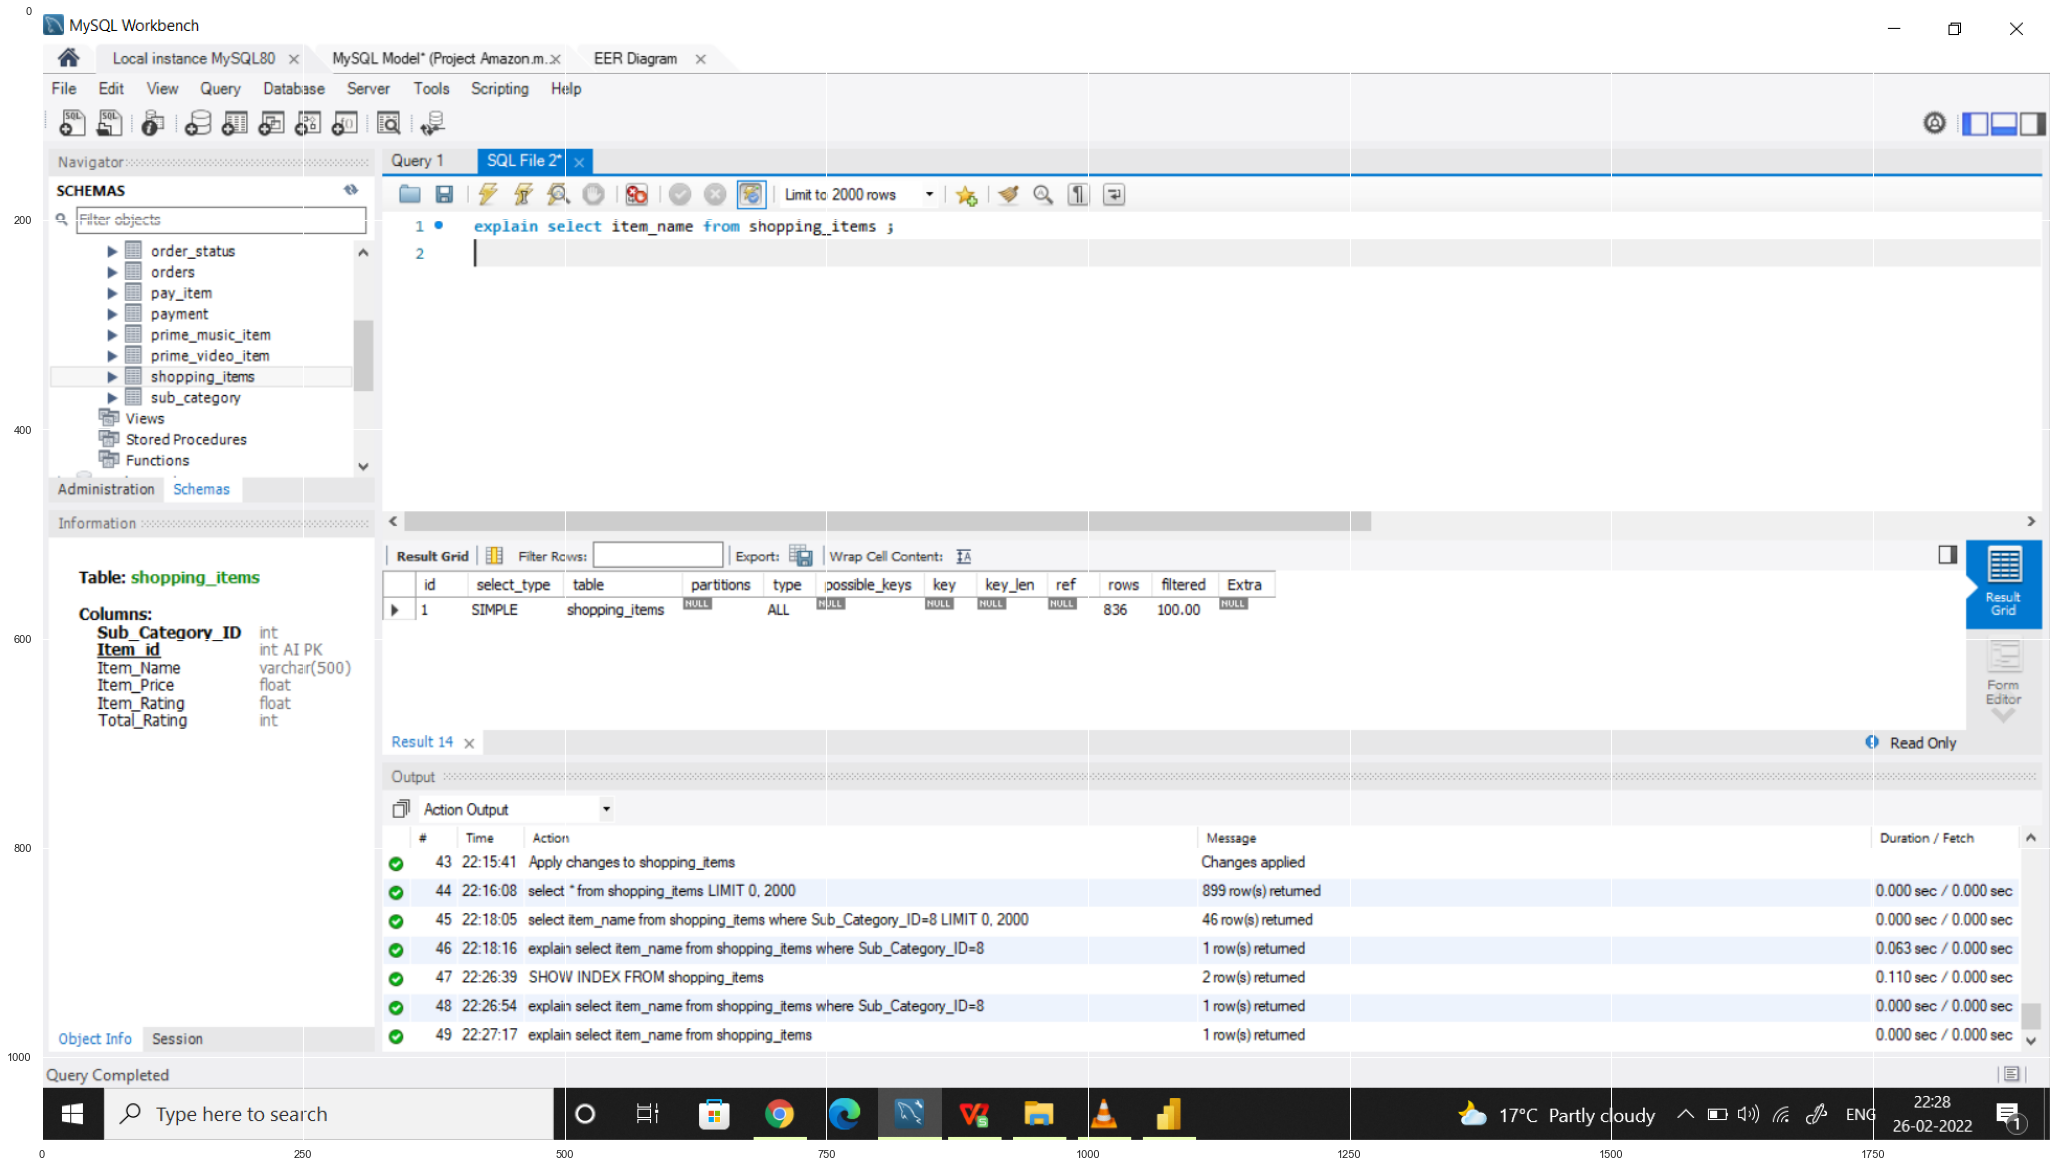

In [ ]:
withoutindex = image.open("without index.png")
plt.figure(figsize=(36,24))
plt.imshow(withoutindex)
plt.show()

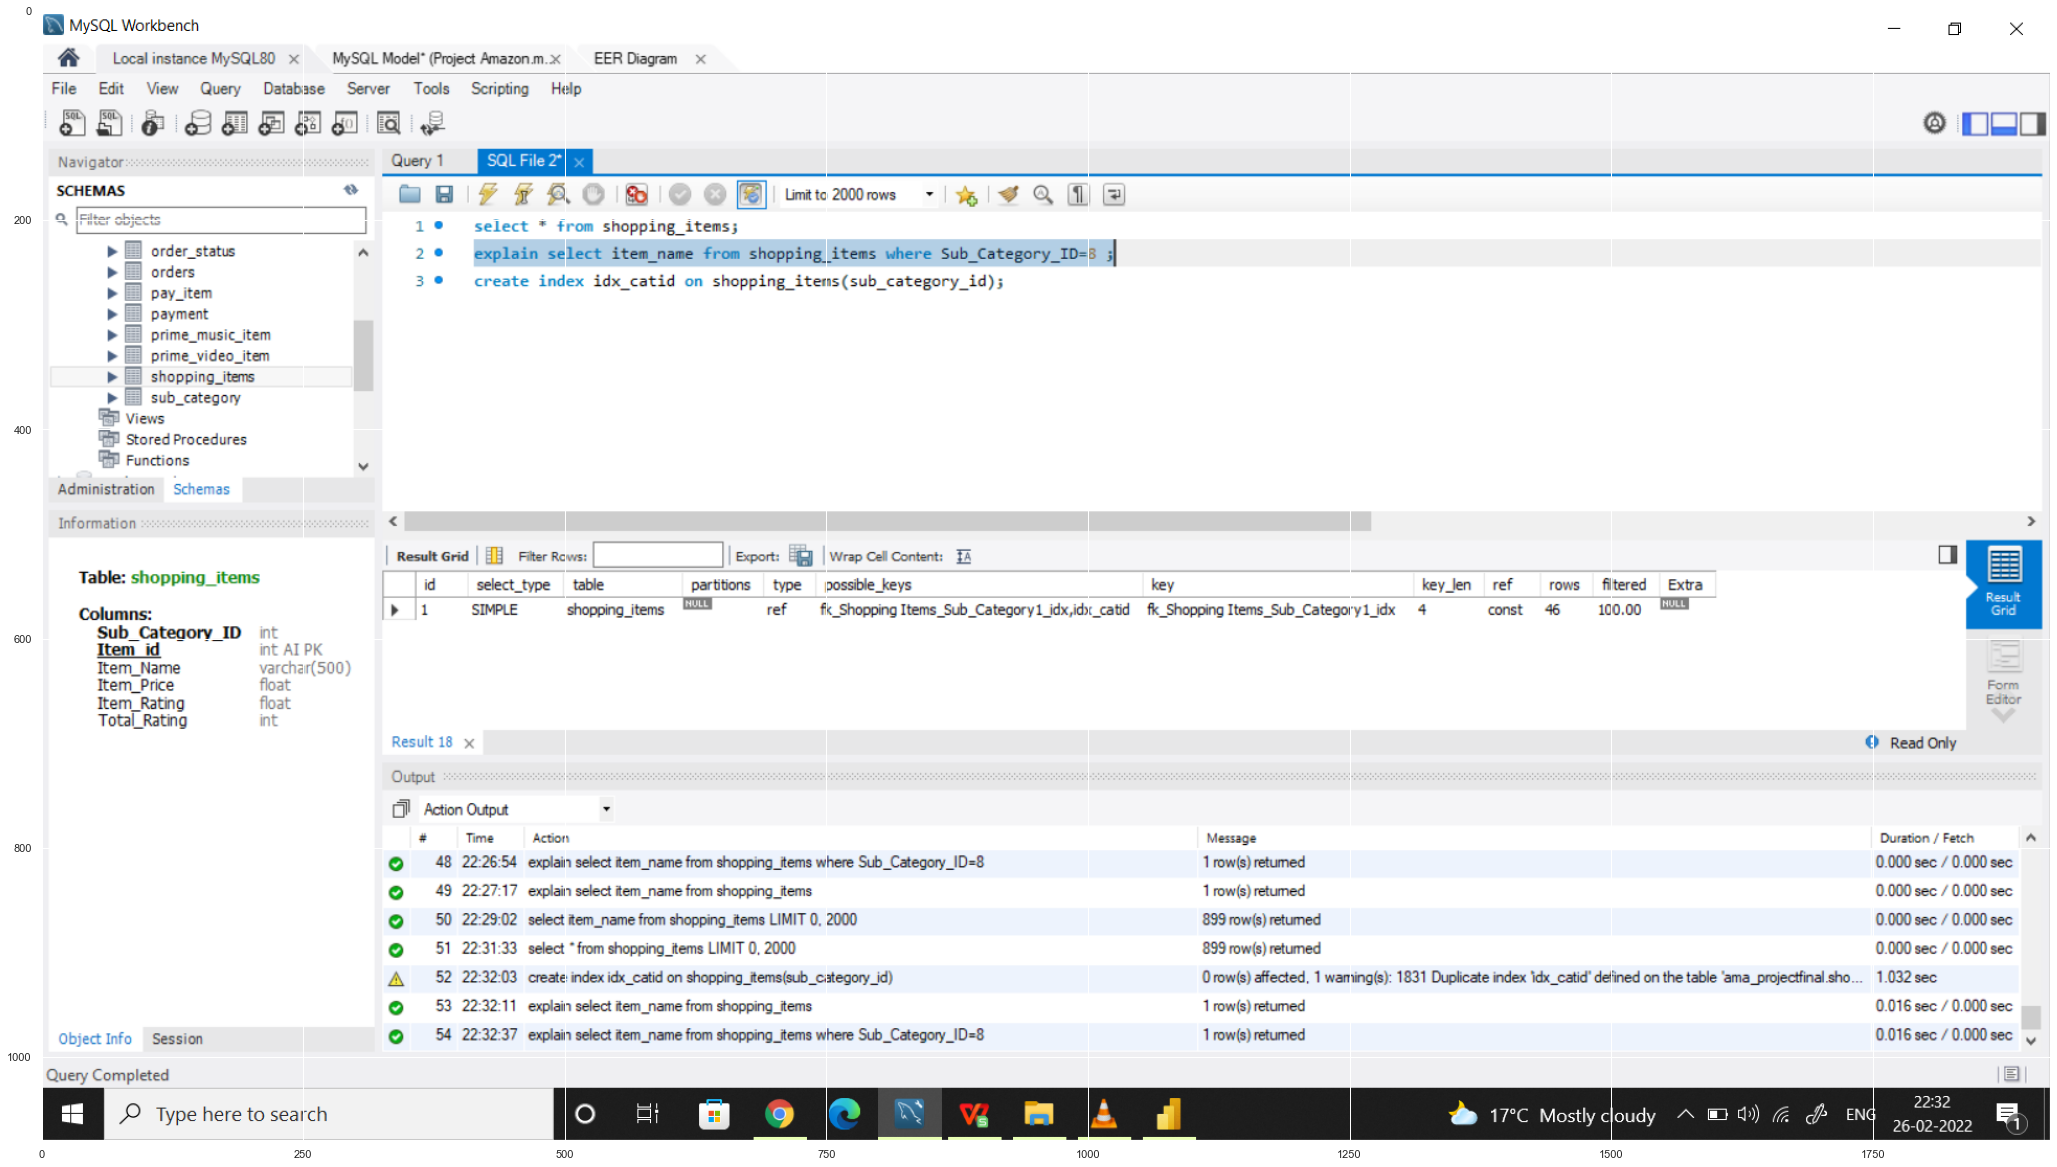

In [ ]:
withindex = image.open("with index.png")
plt.figure(figsize=(36,24))
plt.imshow(withindex)
plt.show()

- Index were used on large table to reduce the over all scanning of table when filter is used,by applying the index we can increase the speed of the query.
- Explain keyword with the statement shows how the rows are scans in a table.
      All keyword in key section of explain keyword employs all rows are scanned in the table.
      Index name in key section employs the rows in column are scanned with the help of index.

In [ ]:
query5=pd.read_sql_query("show index from shopping_items",conn)

In [ ]:
query5

,Table,Non_unique,Key_name,Seq_in_index,Column_name,Collation,Cardinality,Sub_part,Packed,Null,Index_type,Comment,Index_comment,Visible,Expression
0,shopping_items,0,PRIMARY,1,Item_id,A,881,None,None,,BTREE,,,YES,None
1,shopping_items,1,fk_Shopping Items_Sub_Category1_idx,1,Sub_Category_ID,A,31,None,None,,BTREE,,,YES,None
2,shopping_items,1,idx_catid,1,Sub_Category_ID,A,31,None,None,,BTREE,,,YES,None
3,shopping_items,1,idx_vidid,1,Sub_Category_ID,A,31,None,None,,BTREE,,,YES,None


## Trigger : For Auditing the new order & cancelled Order
create table audit
(log_in_id int not null,item_id int not null,order_date date not null,action_type varchar(50) not null 
)
#delimiter //
create trigger auditing
 after insert on orders for each row
 begin
 insert into audit values(new.log_in_id,new.item_id,Now(),"New Order");
 end //
 delimiter ;
# delimiter //
#create trigger del_auditing
 after delete on orders for each row
 begin
 insert into audit values(old.log_in_id,old.item_id,Now(),"Order Cancelled");
 end //
# delimiter ;

query9="insert into orders values  (2,7,4,2,12,2,'2021-03-24');"
cur.execute(query9)

In [ ]:
query10=pd.read_sql_query("select * from audit",conn)
query10

,log_in_id,item_id,order_date,action_type
0,1,11,2022-02-26,New Order
1,2,12,2022-02-26,New Order
2,2,12,2022-02-26,Order Cancelled


## Stored Procedure :
select * from orders;
#DELIMITER //
CREATE PROCEDURE orderg1
(quan  int)
BEGIN
  SELECT * FROM orders
  WHERE  order_quantity> quan;
END //
DELIMITER ;
CALL orderg1(1);

#DELIMITER //
CREATE PROCEDURE shopingpr
(ratquan  float,itemprice int)
BEGIN
  SELECT * FROM shopping_items
  WHERE  item_rating > ratquan and item_price > itemprice;
END //
#DELIMITER ;
CALL shopingpr(4.4,12000);

In [ ]:
query12=pd.read_sql_query("CALL shopingpr(4.4,12000);",conn)
query12

,Sub_Category_ID,Item_id,Item_Name,Item_Price,Item_Rating,Total_Rating
0,8,41,"OnePlus Nord CE 2 5G (Bahamas Blue, 6GB RAM, 1...",23999.0,4.5,2324
1,8,42,"OnePlus Nord CE 2 5G (Gray Mirror, 6GB RAM, 12...",23999.0,4.5,2324
2,8,43,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",24999.0,4.5,2324
3,8,59,Samsung Galaxy Watch 3 45mm Bluetooth (Mystic ...,17990.0,4.5,2348
4,10,110,2021 Apple 10.2-inch (25.91 cm) iPad with A13 ...,44900.0,4.8,896
5,10,111,2021 Apple iPadÿPro with Apple M1 chip (11-inc...,68490.0,4.7,1155
6,10,131,realme Pad 4 GB RAM 64 GB ROM 10.4 inch with W...,18490.0,4.5,199
7,10,138,Samsung Galaxy Tab S7 FE 31.5 cm (12.4 inch) L...,39999.0,4.5,1260
8,29,809,24k (999.9) 10 gm Lotus Yellow Gold Bar,58350.0,4.6,314
9,29,811,24k (999.9) 5 gm Lotus Yellow Gold Bar,29300.0,4.6,367


In [ ]:
conn = connector.connect(host="localhost", port="3306", user="root",
                                      password="07041997", database="ama_projectfinal")

In [ ]:
query11=pd.read_sql_query("CALL orderg1(1);",conn)
query11

,Log_in_ID,Order_Id,Payment_Id,Order_Status_Id,Item_id,Order_Quantity,Order_Date
0,1,2,3,2,137,3,2019-01-08
1,1,3,3,3,537,3,2019-01-08
2,1,4,4,1,360,7,2019-01-15
3,1,5,1,3,1000,4,2019-01-26


 ### Matrialized View Using MYSQL:
 query3 = "CREATE TABLE materialized_view (SELECT * from amazon);"
 cur =conn.cursor()
 cur.execute(query3)

In [ ]:
conn = connector.connect(host="localhost", port="3306", user="root",
                                      password="1234567", database="amazonproject")

In [ ]:
query13=pd.read_sql_query("select * from materialized_view",conn)
query13

,Selection_ID,Selection_Name
0,1,Shopping
1,2,Pay
2,3,Prime Videos
3,4,Prime Music
